# Main Sequence Mass-Luminosity Relation

Figure 1.12 from Chapter 1 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Main-sequence mass-luminosity relation using data from [Eker et al. 2018, MNRAS, 479, 5491](https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.5491E).

Selection criteria: Exclude stars
 * tagged by Eker et al. as types 1,2,3 (discarded for various reasons)
 * tagged as GLB (globlar cluster stars)
 * with luminosity classes III, IV, or IV-V
 * with mass and radius errors >10%
 * with luminosity errors >40%

The data were further augmented by computing logL from logR and logT from the original Eker et al. 
table (provided to use by Eker as a CSV file).

In [5]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig1_12.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data for MS Star M, L, and R

Data are in labeled columns, read using pandas.  Relevant columns for this plot are `logM` and `logL`.

In [7]:
dataFile = 'MainSequence_MLR.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

Msun = 10.0**np.array(data['logM'])
Lsun = 10.0**np.array(data['logL'])

# Compute L/M^3

LM3 = 10.0**(np.array(data['logL']) - 3.0*np.array(data['logM']))

## Figure 1.2 - M-L Diagrams

Left panel is the main sequence M-L relation in log-log space.

Right panel plots L/M$^3$ vs M to emphasize the different L-M relations in different mass range.  Why? 
Different stellar physics at play, read the subsequent chapters of the book!

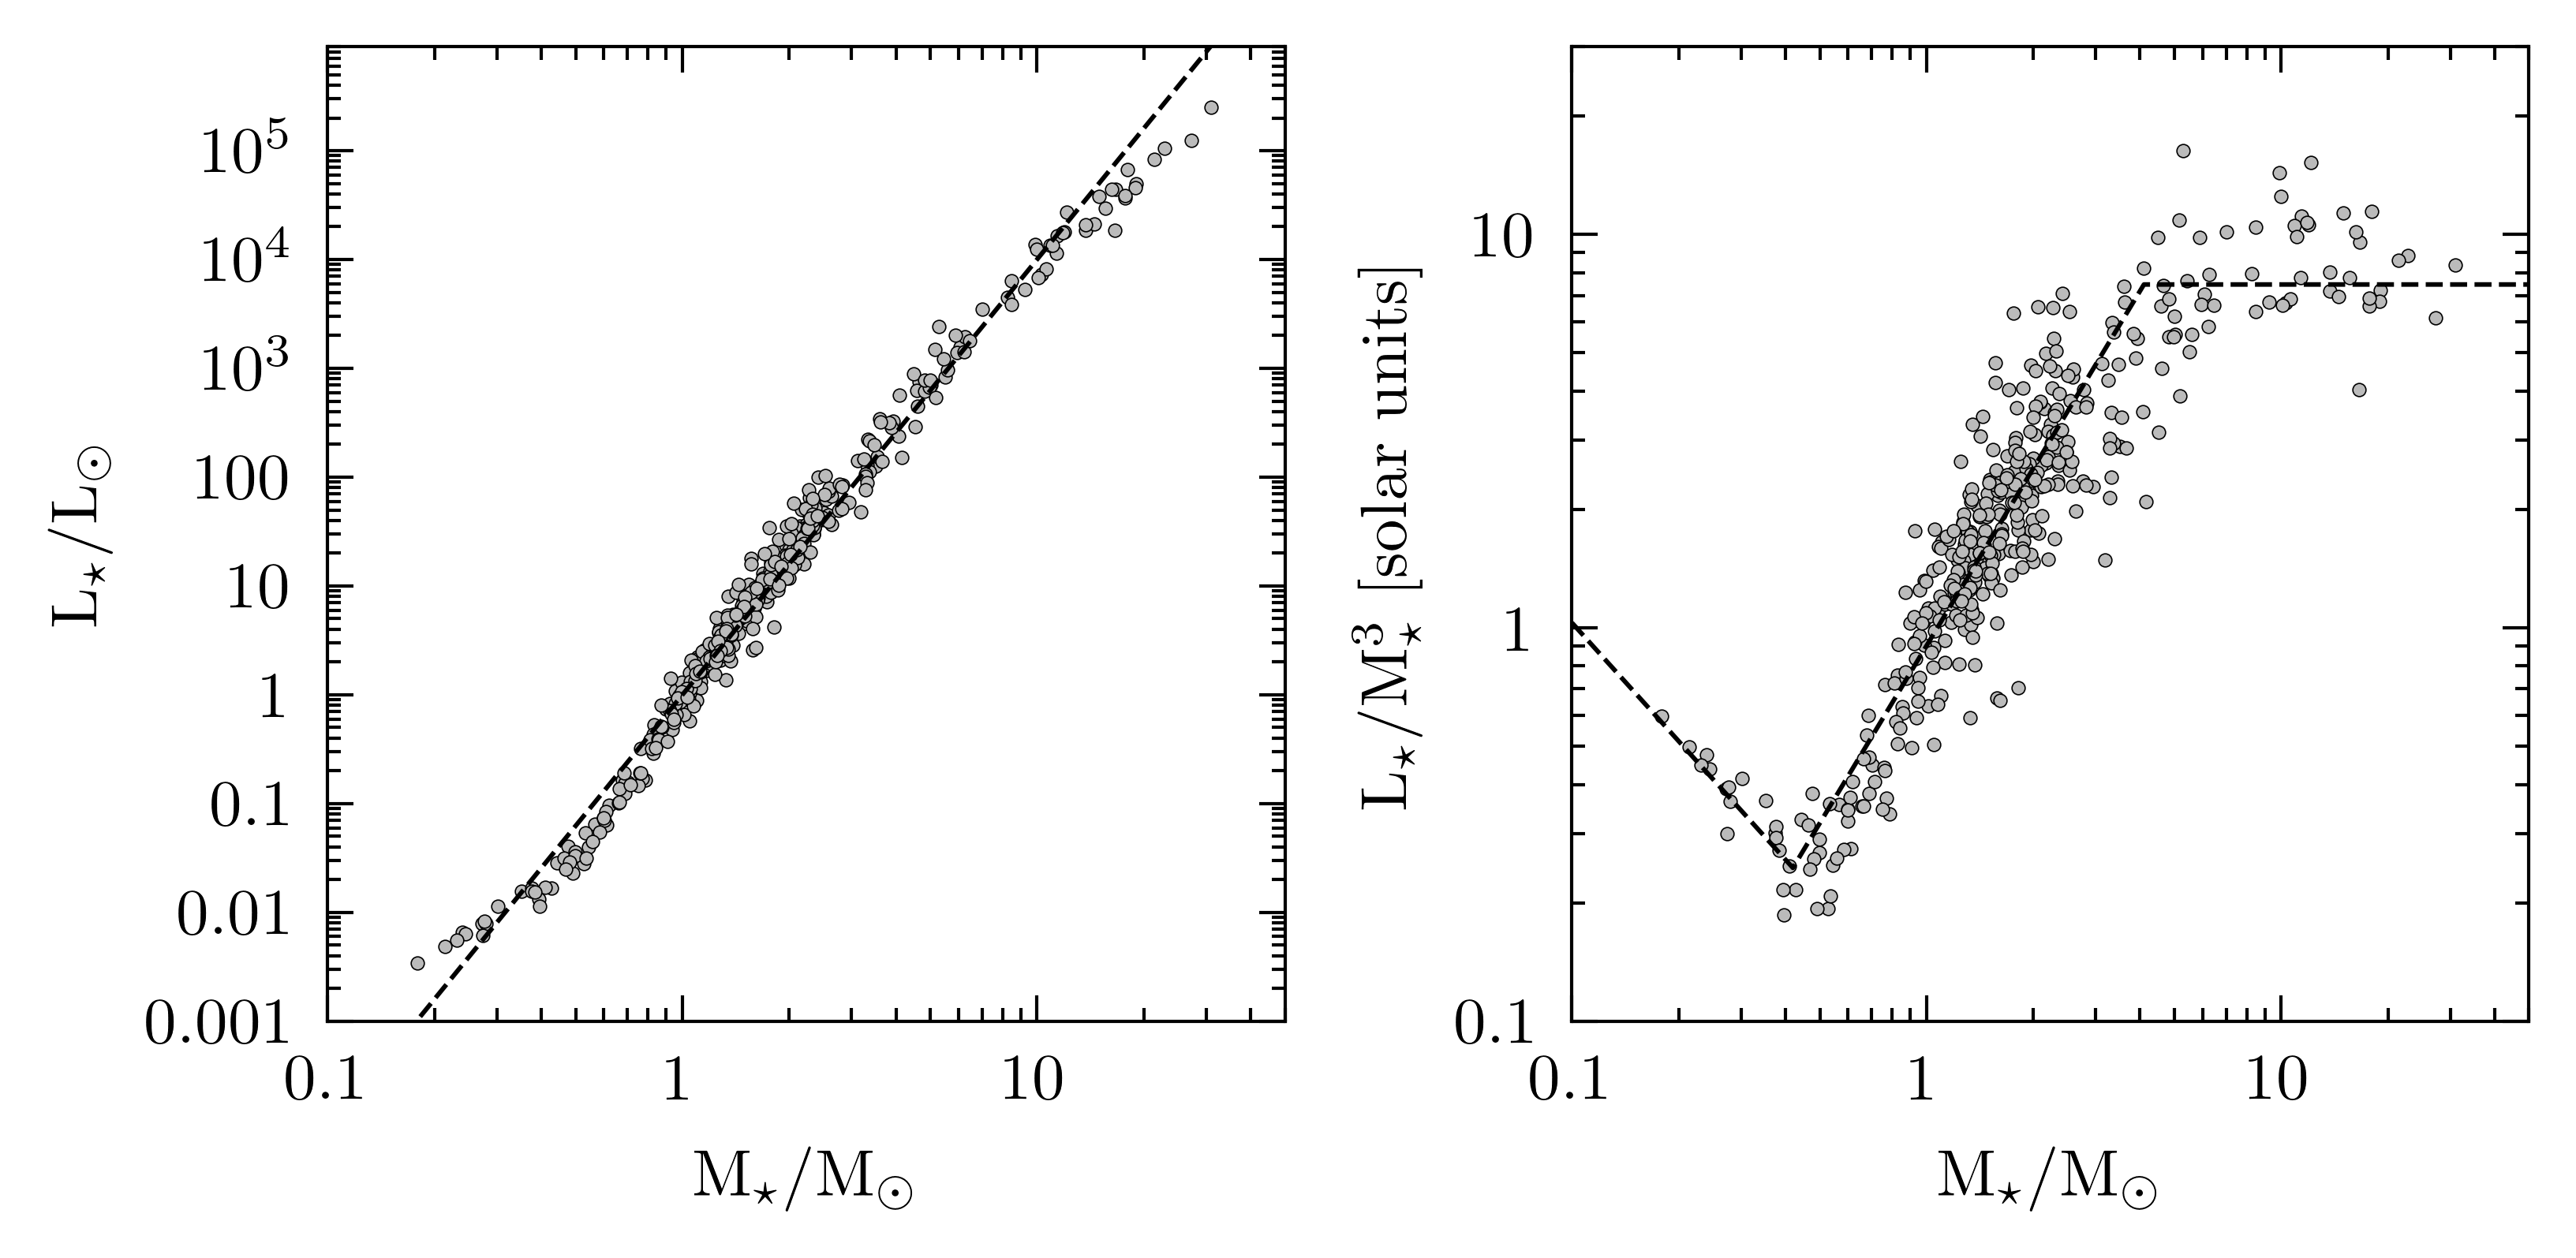

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.3, hspace=0)

# Left panel

minM = 0.1
maxM = 50
minL = 0.001
maxL = 9.0e5
minLM = 0.1
maxLM = 10.0

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(minM,maxM)
ax1.set_xlabel(r'M$_\star$/M$_\odot$',fontsize=10)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([0.1,1.,10.])
ax1.set_xticklabels(['0.1','1','10'])
ax1.set_ylim(minL,maxL)
ax1.set_ylabel(r'L$_\star$/L$_\odot$',fontsize=10)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([0.001,0.01,0.1,1,10,100,1000,1.0e4,1.0e5])
ax1.set_yticklabels(['0.001','0.01','0.1','1','10','100','10$^3$','10$^4$','10$^5$'])

ax1.plot(Msun,Lsun,'o',mfc='#bbbbbb',mec='black',mew=0.2,markersize=2,zorder=10)

# Plot power-law L ~ M^4 through points

ax1.plot([minM,maxM],[minM**4,maxM**4],'--',color='black',lw=0.7,zorder=10)

# Right Panel

# Setup the Plot (our standard size etc.)

minM = 0.1
maxM = 50
minL = 0.001
maxL = 2.0e5
minLM = 0.1
maxLM = 30.0

# Right Panel: L/M^3 vs M

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(minM,maxM)
ax2.set_xlabel(r'M$_\star$/M$_\odot$',fontsize=10)
ax2.set_xscale('log')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xticks([0.1,1.,10.])
ax2.set_xticklabels(['0.1','1','10'])

ax2.set_ylim(minLM,maxLM)
ax2.set_ylabel(r'L$_\star$/M$_\star^{3}$ [solar units]',fontsize=10)
ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.set_yticks([0.1,1,10])
ax2.set_yticklabels(['0.1','1','10'])

ax2.plot(Msun,LM3,'o',mfc='#bbbbbb',mec='black',mew=0.2,markersize=2,zorder=10)

# Plot deviations from simple power-law fits to segments

pwM = 10.0**np.array([-1.0,-0.377,0.613,2.0])
pwLM3 = 10.0**np.array([0.013,-0.610,0.873,0.873])
ax2.plot(pwM,pwLM3,'--',color='black',lw=0.7,zorder=10)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')